In [1]:
%matplotlib widget

import os
import numpy as np
import pandas as pd
import itertools as it
from glob import glob
import matplotlib.pyplot as plt
from sbpy.calib import Sun
from astropy import units as u
from astropy.io import fits

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from astropy.visualization import ImageNormalize, PercentileInterval, AsinhStretch

from lvmdrp.core.constants import LVM_UNAM_URL
from lvmdrp.utils.examples import fetch_example_data, get_frames_metadata, fix_lamps_metadata, get_masters_metadata

from lvmdrp.core import rss, image, spectrum1d
from lvmdrp.functions import imageMethod, rssMethod, fluxCalMethod

plt.style.use("seaborn-v0_8-talk")

In [2]:
# define input data directory
data_path = os.path.abspath(os.path.join("..", "data"))

# let's create the output directory
output_path = "./data"
os.makedirs(output_path, exist_ok=True)

# create processed frames path template
out_main_path = os.path.join(output_path, "lvm-{kind}-{camera}-{expnum}.fits")
out_calib_path = os.path.join(output_path, "lvm-{mjd}-{kind}-{camera}-{exptime}.fits")
out_arc_path = os.path.join(output_path, "lvm-{mjd}-{kind}-{camera}-{lamps}.fits")

# overwrite or not
OVERWRITE = True

In [3]:
# extract metadata
frames_table = get_frames_metadata(path=os.path.join(data_path, "lco_com"), ignore_cache=False).to_pandas()
frames_table = frames_table.loc[~frames_table.mjd.isin([60008,60009,60037,60038])]
# fix arc lamps metadata
fix_lamps_metadata(metadata=frames_table, lamp_names="argon neon ldls hgne xenon krypton".split())

[INFO]: loading cached metadata from '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/data/lco_com/frames_table.pkl'


     mjd  kind camera lamps                                path
2  super  xarc     b1  neon  ./data/lvm-super-xarc-b1-neon.fits
8  super  xarc     b2  neon  ./data/lvm-super-xarc-b2-neon.fits
3  super  xarc     b3  neon  ./data/lvm-super-xarc-b3-neon.fits
4  super  xarc     r1  neon  ./data/lvm-super-xarc-r1-neon.fits
0  super  xarc     r2  neon  ./data/lvm-super-xarc-r2-neon.fits
6  super  xarc     r3  neon  ./data/lvm-super-xarc-r3-neon.fits
1  super  xarc     z1  neon  ./data/lvm-super-xarc-z1-neon.fits
7  super  xarc     z2  neon  ./data/lvm-super-xarc-z2-neon.fits
5  super  xarc     z3  neon  ./data/lvm-super-xarc-z3-neon.fits
mjd                                    super
kind                                    xarc
camera                                    b1
lamps                                   neon
path      ./data/lvm-super-xarc-b1-neon.fits
Name: 2, dtype: object
[INFO]: reading guess lines from '../../python/lvmdrp/etc/lvm-neon_nist_b1.txt'
[INFO]: going to use fiber 319 a

measuring arc lines upwards from ref_fiber = 319: 100%|##########| 319/319 [00:16<00:00, 19.82fiber/s]
measuring arc lines downwards from ref_fiber = 319: 100%|########| 318/318 [00:17<00:00, 18.41fiber/s]


[INFO]: smoothing FWHM of guess lines along cross-dispersion axis using 3-deg polynomials
[INFO]: fitting wavelength solutions using 3-deg polynomials
[INFO]: finished wavelength fitting with median RMS = 0.195206 AA (0.334465 pix)
[INFO]: fitting LSF solutions using 3-deg polynomials
[INFO]: finished LSF fitting with median RMS = 0.0458121 AA (0.0780815 pix)


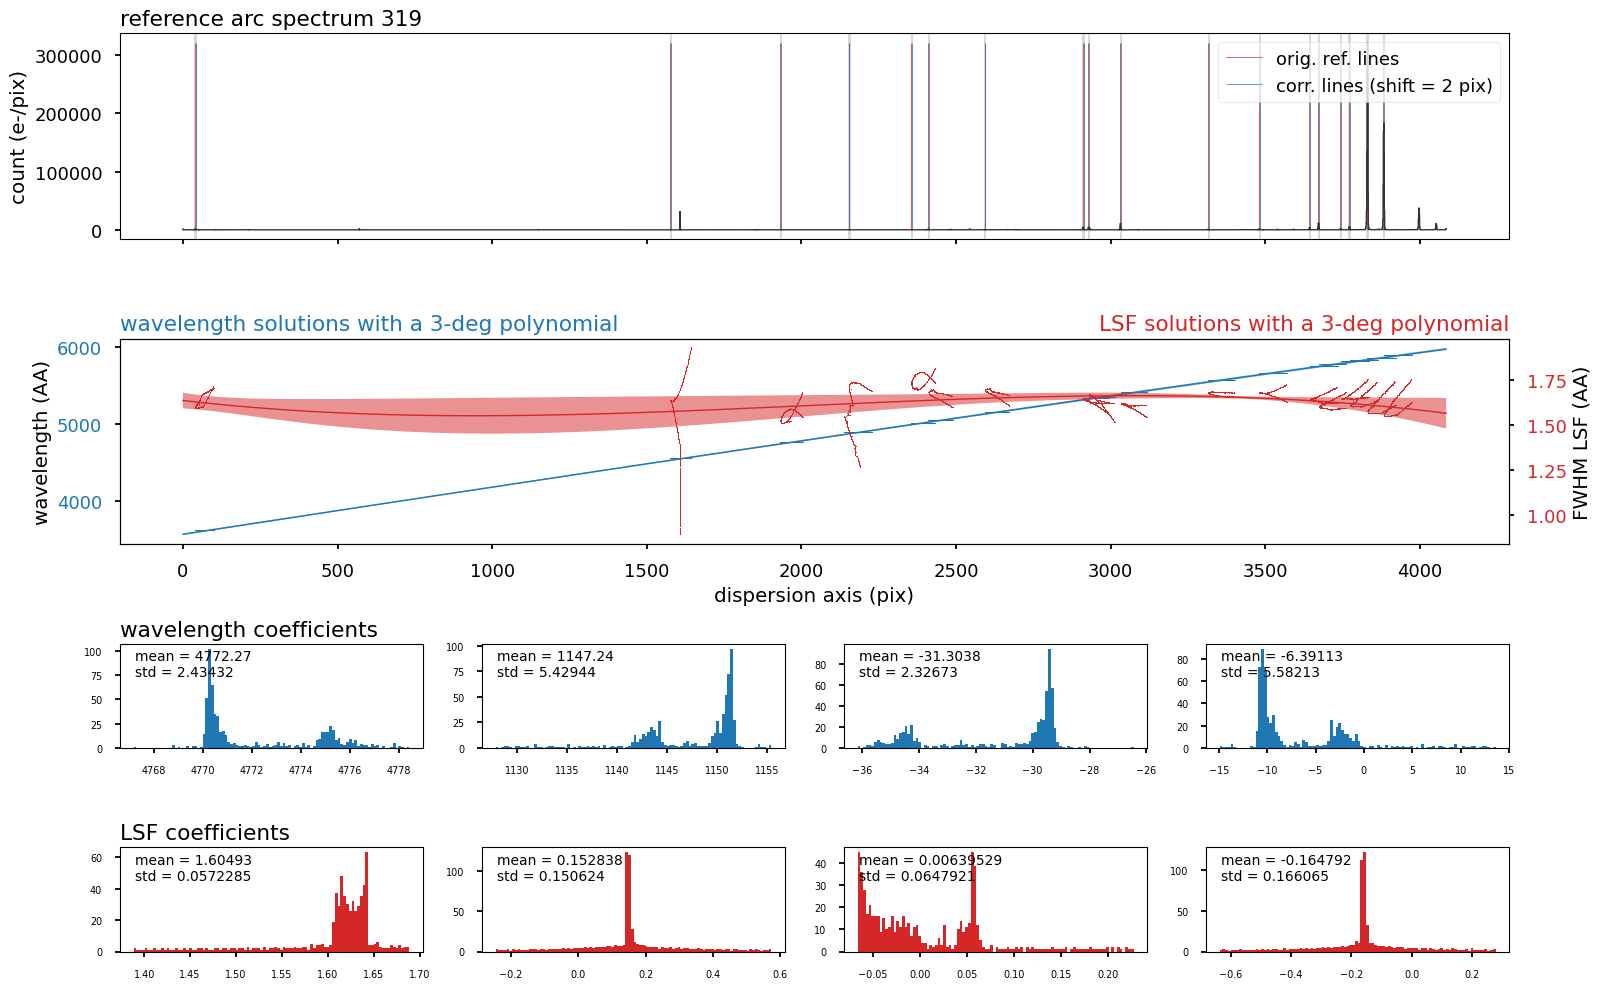

[INFO]: updating header and writing wavelength/LSF to './data/lvm-super-wave-b1-neon.fits' and './data/lvm-super-lsf-b1-neon.fits'
mjd                                    super
kind                                    xarc
camera                                    b2
lamps                                   neon
path      ./data/lvm-super-xarc-b2-neon.fits
Name: 8, dtype: object
[INFO]: reading guess lines from '../../python/lvmdrp/etc/lvm-neon_nist_b1.txt'
[INFO]: going to use fiber 319 as reference
[INFO]: number of guess lines in file 19 percentage masked  5.26316 %
[INFO]: going to use 18 guess lines
[INFO]: reading arc from './data/lvm-super-xarc-b2-neon.fits'
[INFO]: calculating shift in guess lines using CC
[INFO]: maximum CC shift = 38 pix
[INFO]: measuring arc lines for each fiber from reference fiber 319, flux_min = 1e-05, fwhm_max = 5.0 and relative flux limits [0.001, 100.0]


measuring arc lines upwards from ref_fiber = 319: 100%|##########| 319/319 [00:48<00:00,  6.54fiber/s]
measuring arc lines downwards from ref_fiber = 319: 100%|########| 318/318 [00:39<00:00,  8.12fiber/s]


[INFO]: smoothing FWHM of guess lines along cross-dispersion axis using 3-deg polynomials
[INFO]: fitting wavelength solutions using 3-deg polynomials
[INFO]: finished wavelength fitting with median RMS = 0.530715 AA (0.90765 pix)
[INFO]: fitting LSF solutions using 3-deg polynomials
[INFO]: finished LSF fitting with median RMS = 0.0773105 AA (0.131193 pix)


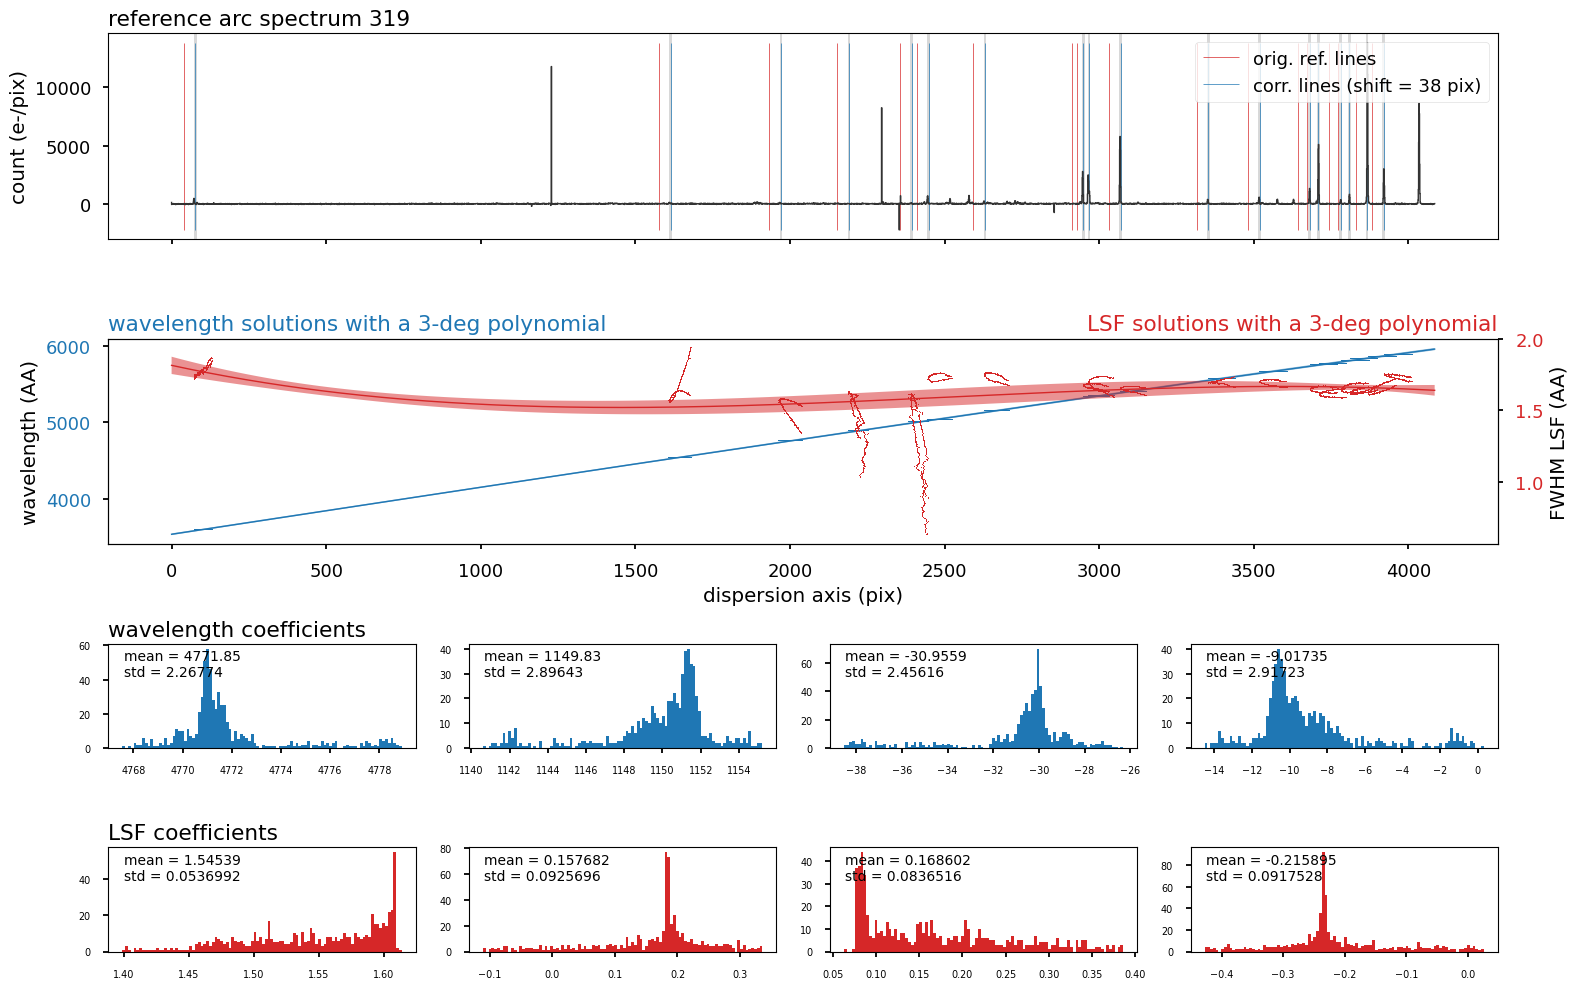

[INFO]: updating header and writing wavelength/LSF to './data/lvm-super-wave-b2-neon.fits' and './data/lvm-super-lsf-b2-neon.fits'
mjd                                    super
kind                                    xarc
camera                                    b3
lamps                                   neon
path      ./data/lvm-super-xarc-b3-neon.fits
Name: 3, dtype: object
[INFO]: reading guess lines from '../../python/lvmdrp/etc/lvm-neon_nist_b1.txt'
[INFO]: going to use fiber 319 as reference
[INFO]: number of guess lines in file 19 percentage masked  5.26316 %
[INFO]: going to use 18 guess lines
[INFO]: reading arc from './data/lvm-super-xarc-b3-neon.fits'
[INFO]: calculating shift in guess lines using CC
[INFO]: maximum CC shift = 37 pix
[INFO]: measuring arc lines for each fiber from reference fiber 319, flux_min = 1e-05, fwhm_max = 5.0 and relative flux limits [0.001, 100.0]


measuring arc lines upwards from ref_fiber = 319: 100%|##########| 319/319 [00:11<00:00, 28.99fiber/s]
measuring arc lines downwards from ref_fiber = 319: 100%|########| 318/318 [00:07<00:00, 41.91fiber/s]


[INFO]: smoothing FWHM of guess lines along cross-dispersion axis using 3-deg polynomials
[INFO]: fitting wavelength solutions using 3-deg polynomials
[INFO]: finished wavelength fitting with median RMS = 0.144064 AA (0.243941 pix)
[INFO]: fitting LSF solutions using 3-deg polynomials
[INFO]: finished LSF fitting with median RMS = 0.0480345 AA (0.0814183 pix)


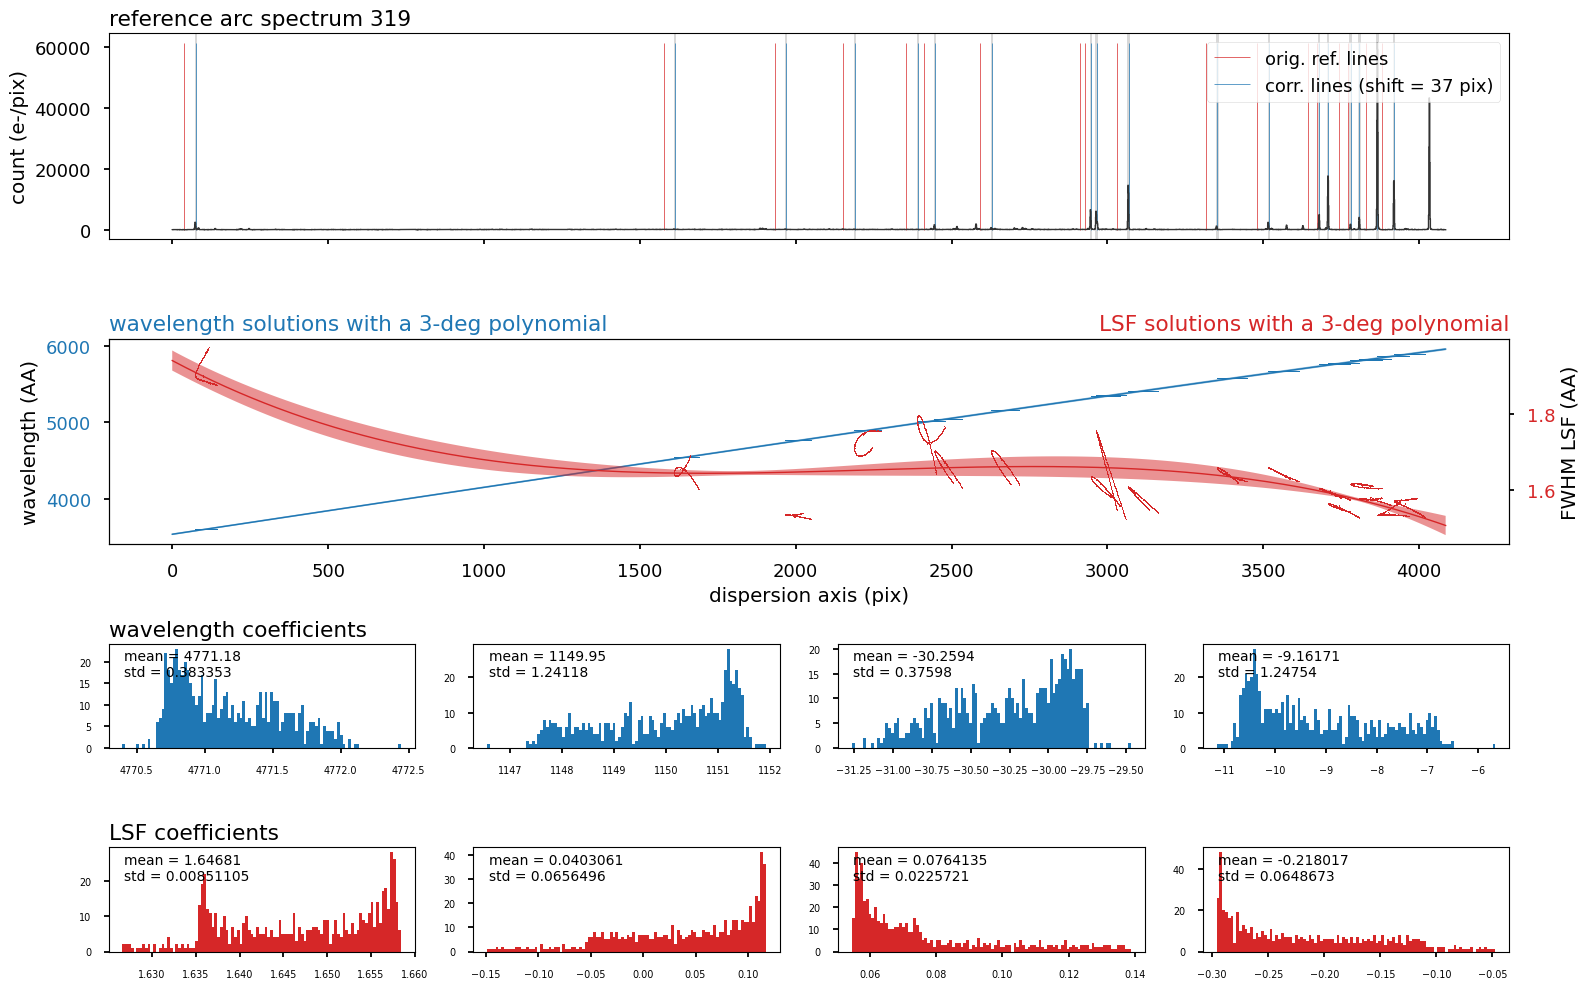

[INFO]: updating header and writing wavelength/LSF to './data/lvm-super-wave-b3-neon.fits' and './data/lvm-super-lsf-b3-neon.fits'
mjd                                    super
kind                                    xarc
camera                                    r1
lamps                                   neon
path      ./data/lvm-super-xarc-r1-neon.fits
Name: 4, dtype: object
[INFO]: reading guess lines from '../../python/lvmdrp/etc/lvm-neon_nist_r1.txt'
[INFO]: going to use fiber 319 as reference
[INFO]: number of guess lines in file 31 percentage masked  6.45161 %
[INFO]: going to use 29 guess lines
[INFO]: reading arc from './data/lvm-super-xarc-r1-neon.fits'
[INFO]: calculating shift in guess lines using CC
[INFO]: maximum CC shift = 1 pix
[INFO]: measuring arc lines for each fiber from reference fiber 319, flux_min = 1e-05, fwhm_max = 5.0 and relative flux limits [0.001, 100.0]


measuring arc lines upwards from ref_fiber = 319: 100%|##########| 319/319 [00:10<00:00, 29.43fiber/s]
measuring arc lines downwards from ref_fiber = 319: 100%|########| 318/318 [00:09<00:00, 35.03fiber/s]


[INFO]: smoothing FWHM of guess lines along cross-dispersion axis using 3-deg polynomials
[INFO]: fitting wavelength solutions using 3-deg polynomials
[INFO]: finished wavelength fitting with median RMS = 0.139171 AA (0.262414 pix)
[INFO]: fitting LSF solutions using 3-deg polynomials
[INFO]: finished LSF fitting with median RMS = 0.179471 AA (0.335114 pix)


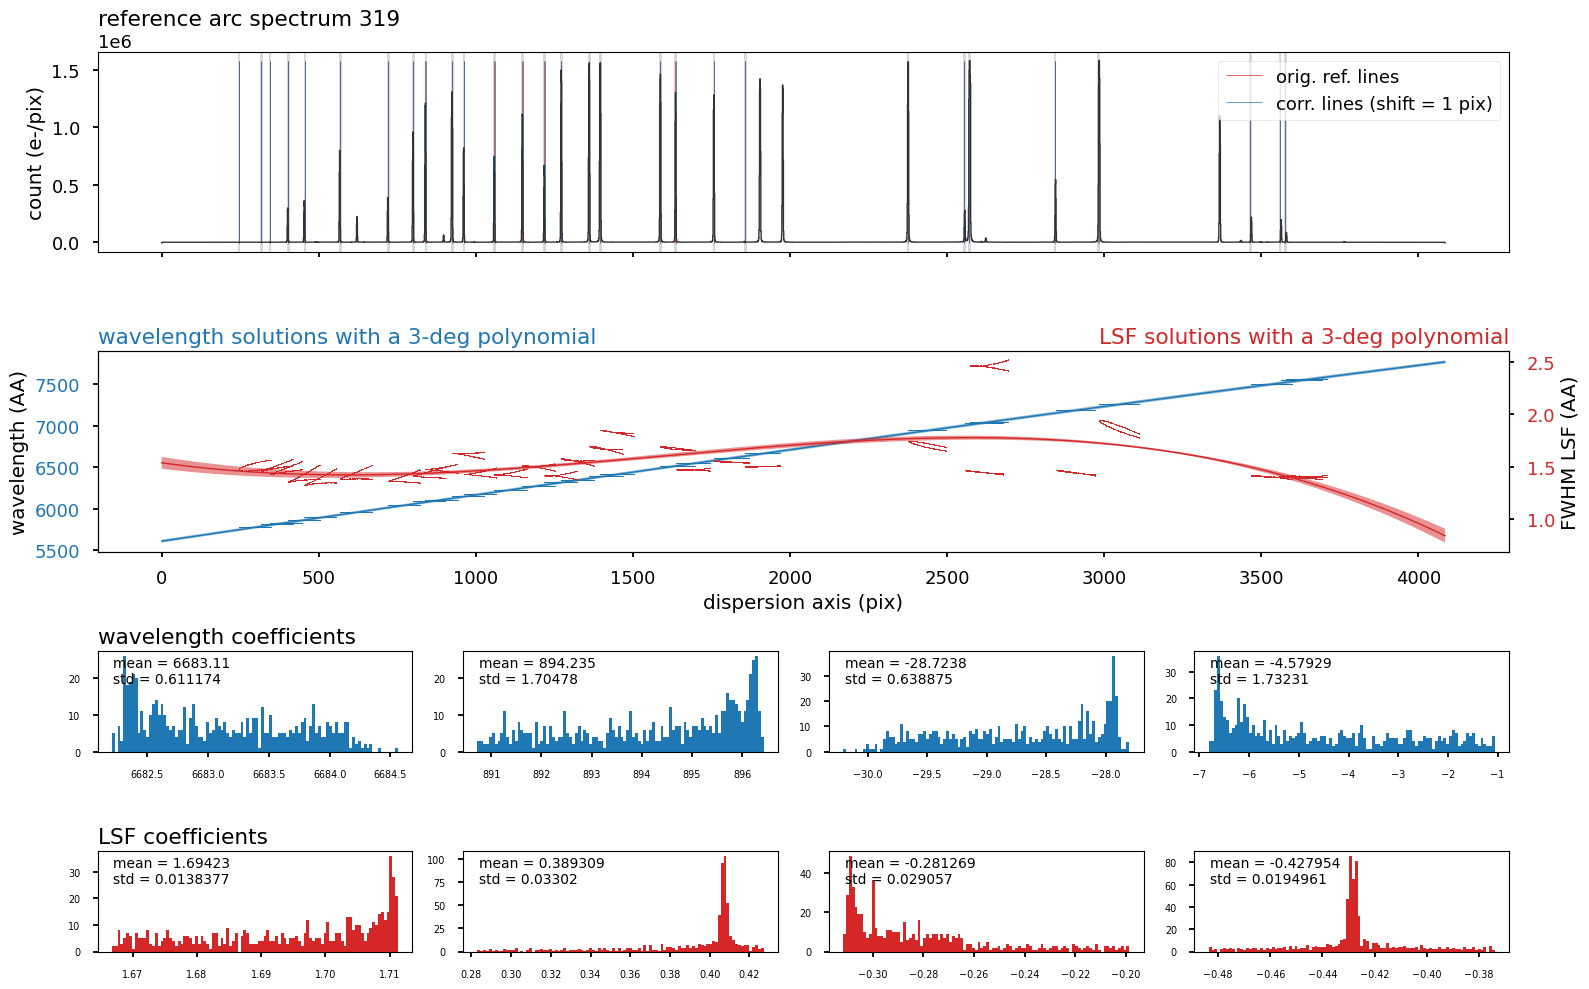

[INFO]: updating header and writing wavelength/LSF to './data/lvm-super-wave-r1-neon.fits' and './data/lvm-super-lsf-r1-neon.fits'
mjd                                    super
kind                                    xarc
camera                                    r2
lamps                                   neon
path      ./data/lvm-super-xarc-r2-neon.fits
Name: 0, dtype: object
[INFO]: reading guess lines from '../../python/lvmdrp/etc/lvm-neon_nist_r1.txt'
[INFO]: going to use fiber 319 as reference
[INFO]: number of guess lines in file 31 percentage masked  6.45161 %
[INFO]: going to use 29 guess lines
[INFO]: reading arc from './data/lvm-super-xarc-r2-neon.fits'
[INFO]: calculating shift in guess lines using CC
[INFO]: maximum CC shift = 7 pix
[INFO]: measuring arc lines for each fiber from reference fiber 319, flux_min = 1e-05, fwhm_max = 5.0 and relative flux limits [0.001, 100.0]


measuring arc lines upwards from ref_fiber = 319: 100%|##########| 319/319 [00:08<00:00, 37.19fiber/s]
measuring arc lines downwards from ref_fiber = 319: 100%|########| 318/318 [00:08<00:00, 39.32fiber/s]


[INFO]: smoothing FWHM of guess lines along cross-dispersion axis using 3-deg polynomials
[INFO]: fitting wavelength solutions using 3-deg polynomials
[INFO]: finished wavelength fitting with median RMS = 0.125405 AA (0.235002 pix)
[INFO]: fitting LSF solutions using 3-deg polynomials
[INFO]: finished LSF fitting with median RMS = 0.108264 AA (0.200584 pix)


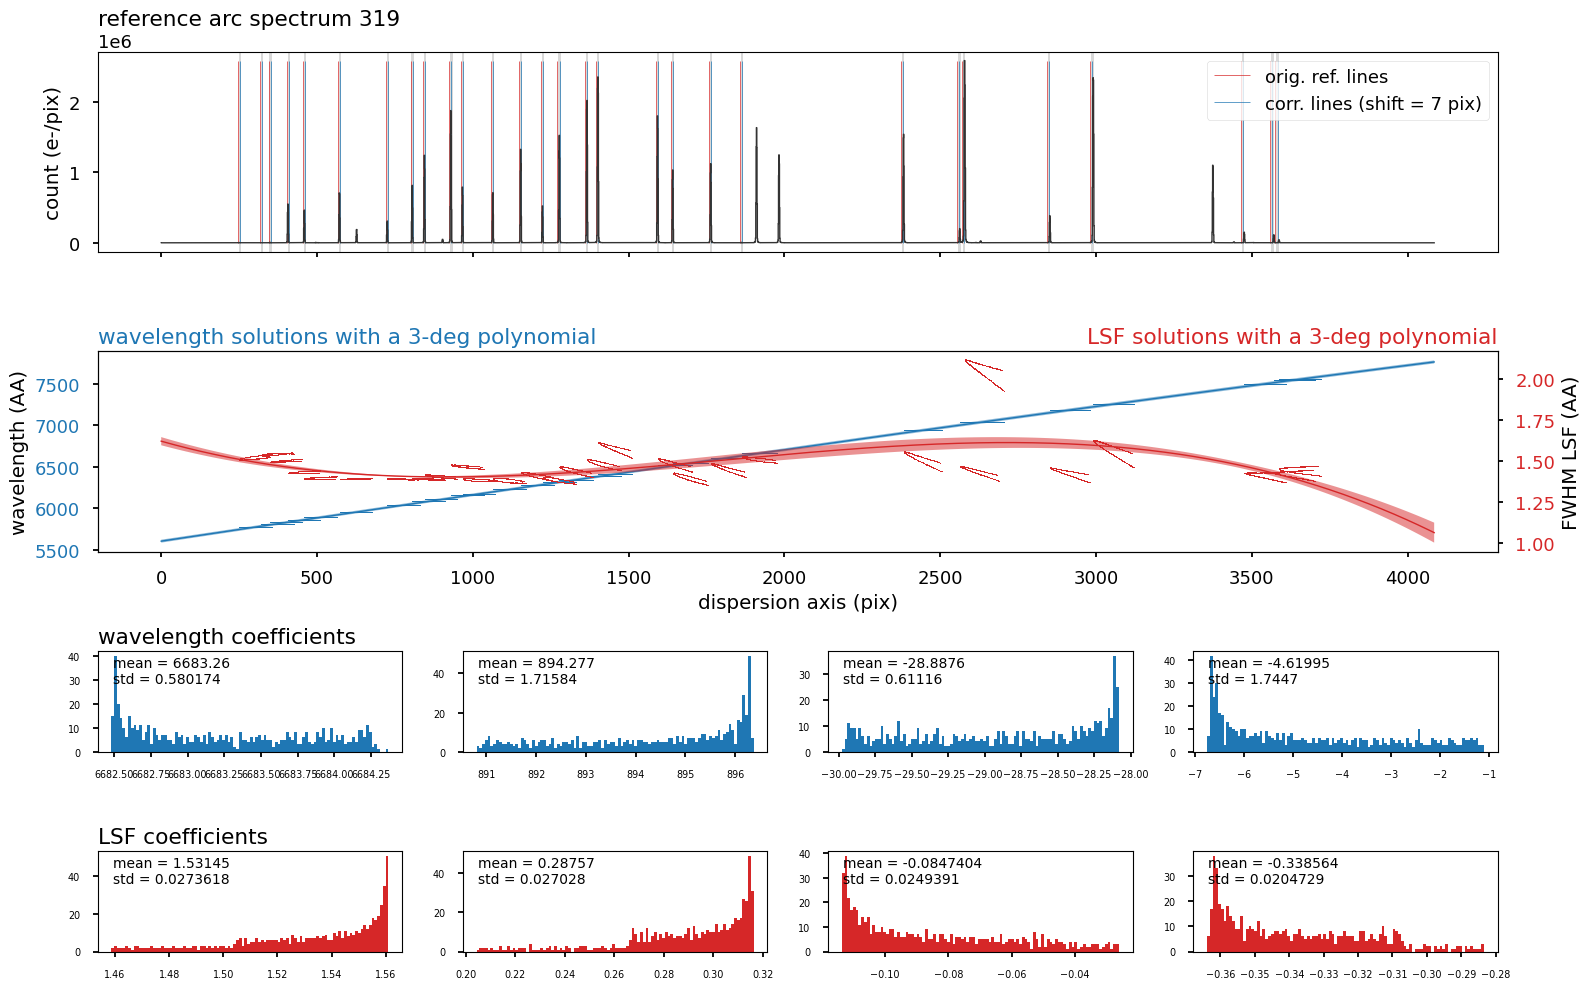

[INFO]: updating header and writing wavelength/LSF to './data/lvm-super-wave-r2-neon.fits' and './data/lvm-super-lsf-r2-neon.fits'
mjd                                    super
kind                                    xarc
camera                                    r3
lamps                                   neon
path      ./data/lvm-super-xarc-r3-neon.fits
Name: 6, dtype: object
[INFO]: reading guess lines from '../../python/lvmdrp/etc/lvm-neon_nist_r1.txt'
[INFO]: going to use fiber 319 as reference
[INFO]: number of guess lines in file 31 percentage masked  6.45161 %
[INFO]: going to use 29 guess lines
[INFO]: reading arc from './data/lvm-super-xarc-r3-neon.fits'
[INFO]: calculating shift in guess lines using CC
[INFO]: maximum CC shift = -6 pix
[INFO]: measuring arc lines for each fiber from reference fiber 319, flux_min = 1e-05, fwhm_max = 5.0 and relative flux limits [0.001, 100.0]


measuring arc lines upwards from ref_fiber = 319: 100%|##########| 319/319 [00:17<00:00, 18.63fiber/s]
measuring arc lines downwards from ref_fiber = 319: 100%|########| 318/318 [00:24<00:00, 13.20fiber/s]


[INFO]: smoothing FWHM of guess lines along cross-dispersion axis using 3-deg polynomials
[INFO]: fitting wavelength solutions using 3-deg polynomials
[INFO]: finished wavelength fitting with median RMS = 1.3312 AA (2.52496 pix)
[INFO]: fitting LSF solutions using 3-deg polynomials
[INFO]: finished LSF fitting with median RMS = 0.238027 AA (0.455193 pix)


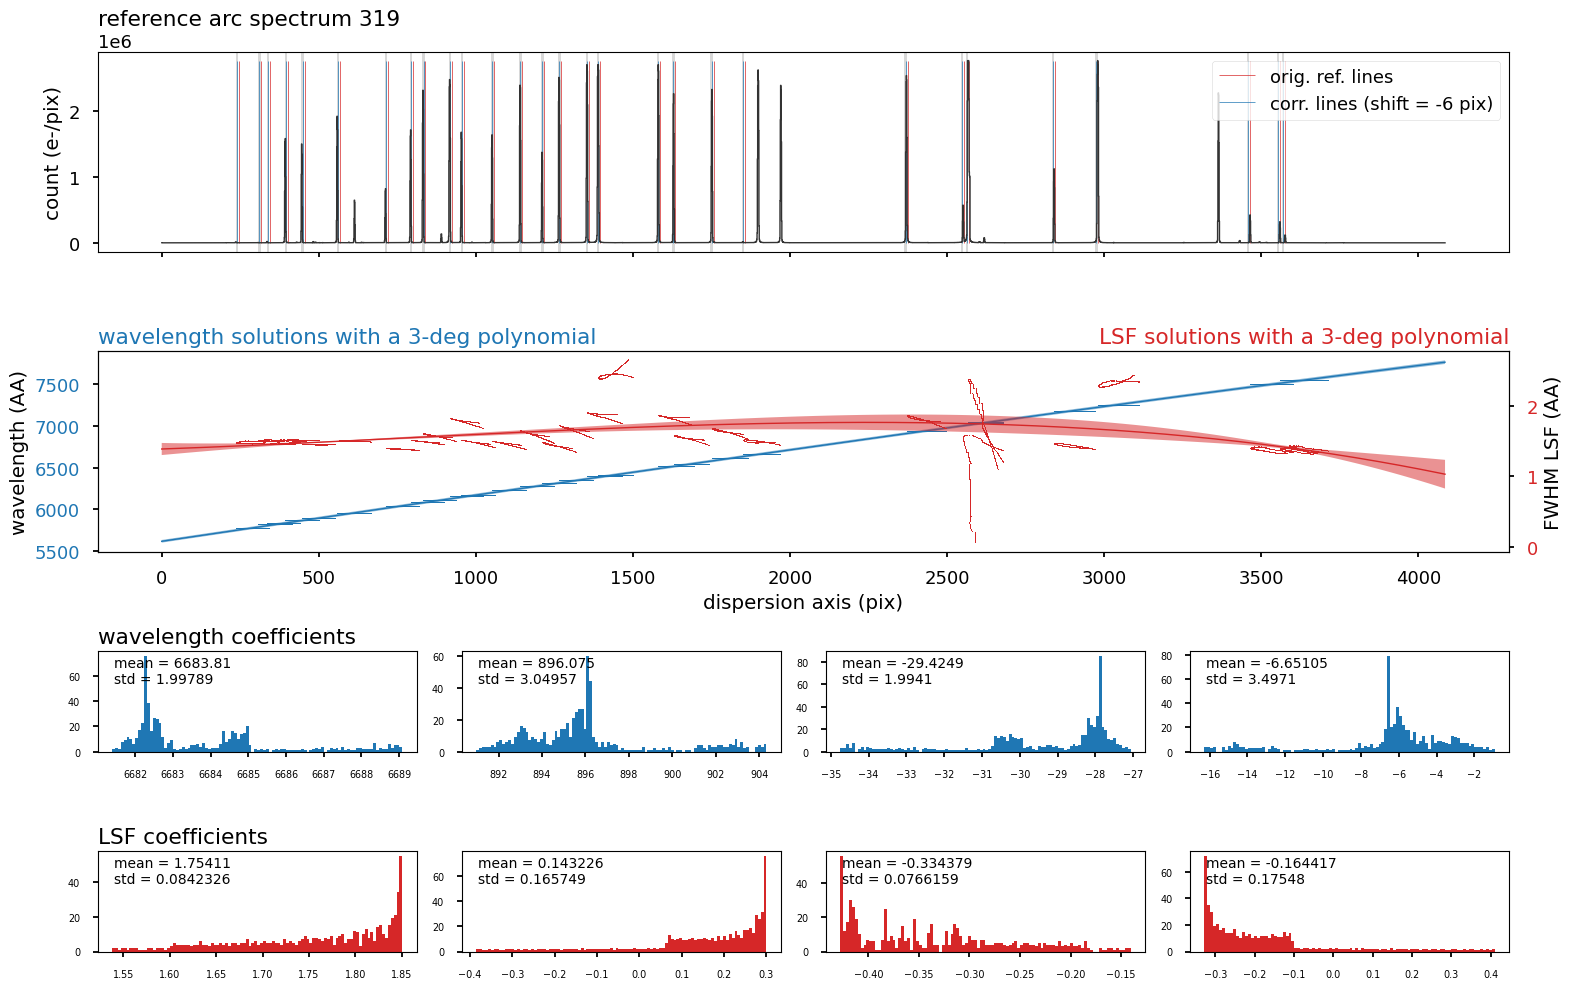

[INFO]: updating header and writing wavelength/LSF to './data/lvm-super-wave-r3-neon.fits' and './data/lvm-super-lsf-r3-neon.fits'
mjd                                    super
kind                                    xarc
camera                                    z1
lamps                                   neon
path      ./data/lvm-super-xarc-z1-neon.fits
Name: 1, dtype: object
[INFO]: reading guess lines from '../../python/lvmdrp/etc/lvm-neon_nist_z1.txt'
[INFO]: going to use fiber 319 as reference
[INFO]: number of guess lines in file 29 percentage masked  17.2414 %
[INFO]: going to use 24 guess lines
[INFO]: reading arc from './data/lvm-super-xarc-z1-neon.fits'
[INFO]: calculating shift in guess lines using CC
[INFO]: maximum CC shift = 0 pix
[INFO]: measuring arc lines for each fiber from reference fiber 319, flux_min = 1e-05, fwhm_max = 5.0 and relative flux limits [0.001, 100.0]


measuring arc lines upwards from ref_fiber = 319: 100%|##########| 319/319 [00:07<00:00, 45.08fiber/s]
measuring arc lines downwards from ref_fiber = 319: 100%|########| 318/318 [00:06<00:00, 50.57fiber/s]


[INFO]: smoothing FWHM of guess lines along cross-dispersion axis using 3-deg polynomials
[INFO]: fitting wavelength solutions using 3-deg polynomials
[INFO]: finished wavelength fitting with median RMS = 0.240267 AA (0.395909 pix)
[INFO]: fitting LSF solutions using 3-deg polynomials
[INFO]: finished LSF fitting with median RMS = 0.0332466 AA (0.05539 pix)


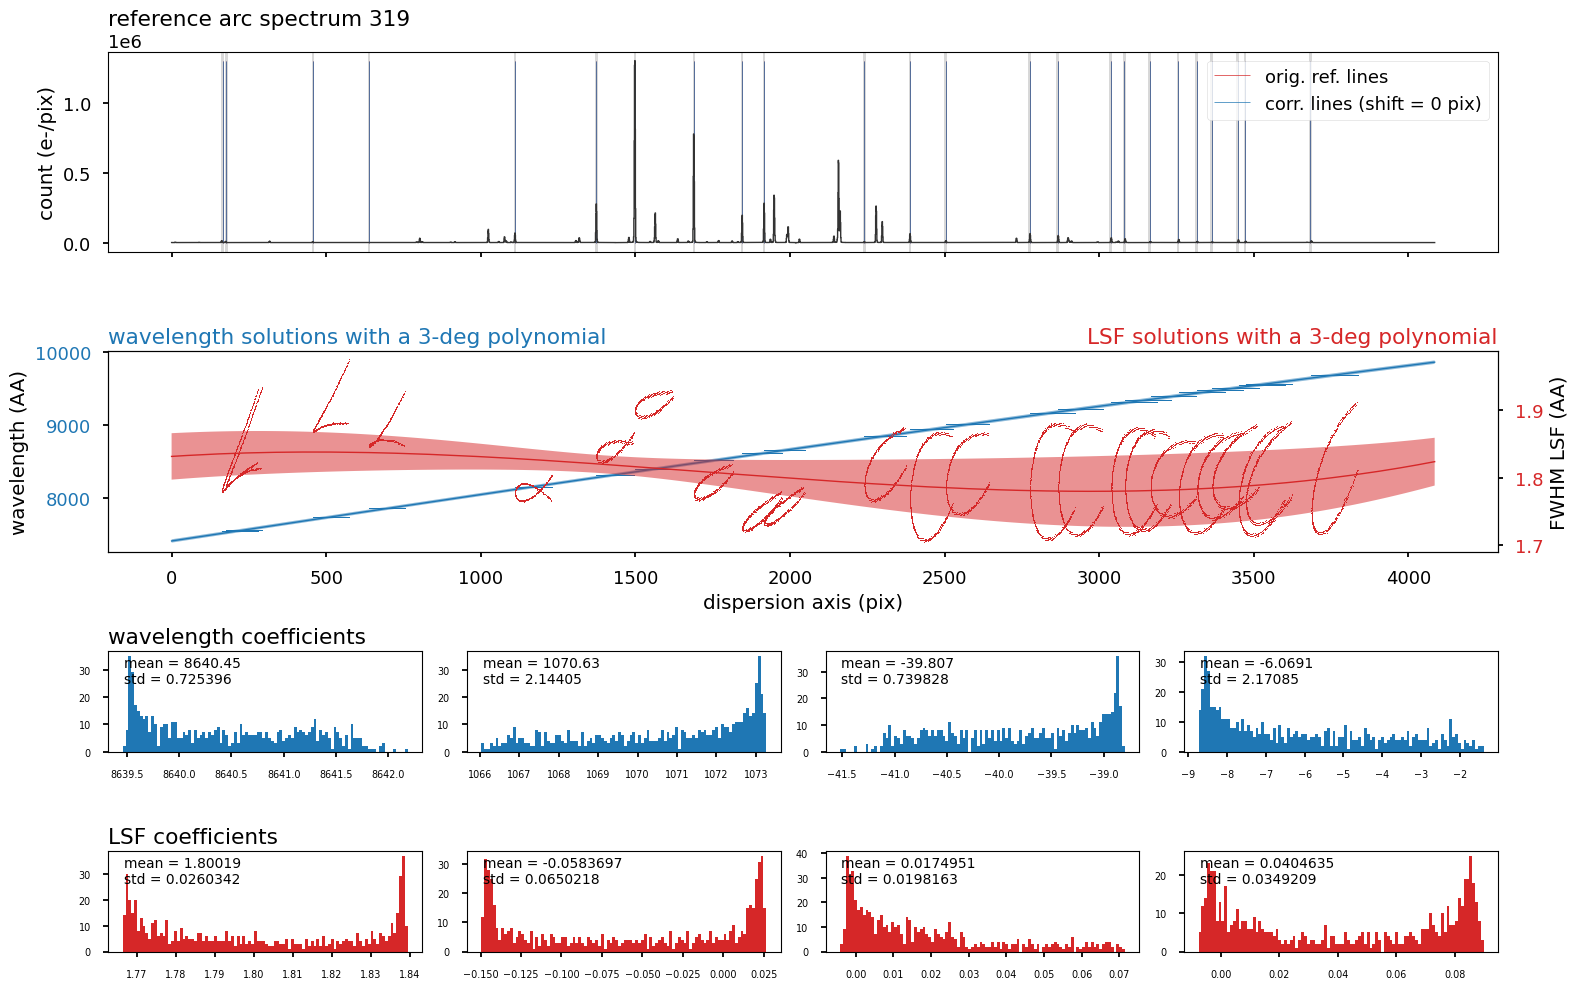

[INFO]: updating header and writing wavelength/LSF to './data/lvm-super-wave-z1-neon.fits' and './data/lvm-super-lsf-z1-neon.fits'
mjd                                    super
kind                                    xarc
camera                                    z2
lamps                                   neon
path      ./data/lvm-super-xarc-z2-neon.fits
Name: 7, dtype: object
[INFO]: reading guess lines from '../../python/lvmdrp/etc/lvm-neon_nist_z1.txt'
[INFO]: going to use fiber 319 as reference
[INFO]: number of guess lines in file 29 percentage masked  17.2414 %
[INFO]: going to use 24 guess lines
[INFO]: reading arc from './data/lvm-super-xarc-z2-neon.fits'
[INFO]: calculating shift in guess lines using CC
[INFO]: maximum CC shift = 9 pix
[INFO]: measuring arc lines for each fiber from reference fiber 319, flux_min = 1e-05, fwhm_max = 5.0 and relative flux limits [0.001, 100.0]


measuring arc lines upwards from ref_fiber = 319: 100%|##########| 319/319 [00:06<00:00, 45.90fiber/s]
measuring arc lines downwards from ref_fiber = 319: 100%|########| 318/318 [00:06<00:00, 49.66fiber/s]


[INFO]: smoothing FWHM of guess lines along cross-dispersion axis using 3-deg polynomials
[INFO]: fitting wavelength solutions using 3-deg polynomials
[INFO]: finished wavelength fitting with median RMS = 0.234212 AA (0.387675 pix)
[INFO]: fitting LSF solutions using 3-deg polynomials
[INFO]: finished LSF fitting with median RMS = 0.0255859 AA (0.0430891 pix)


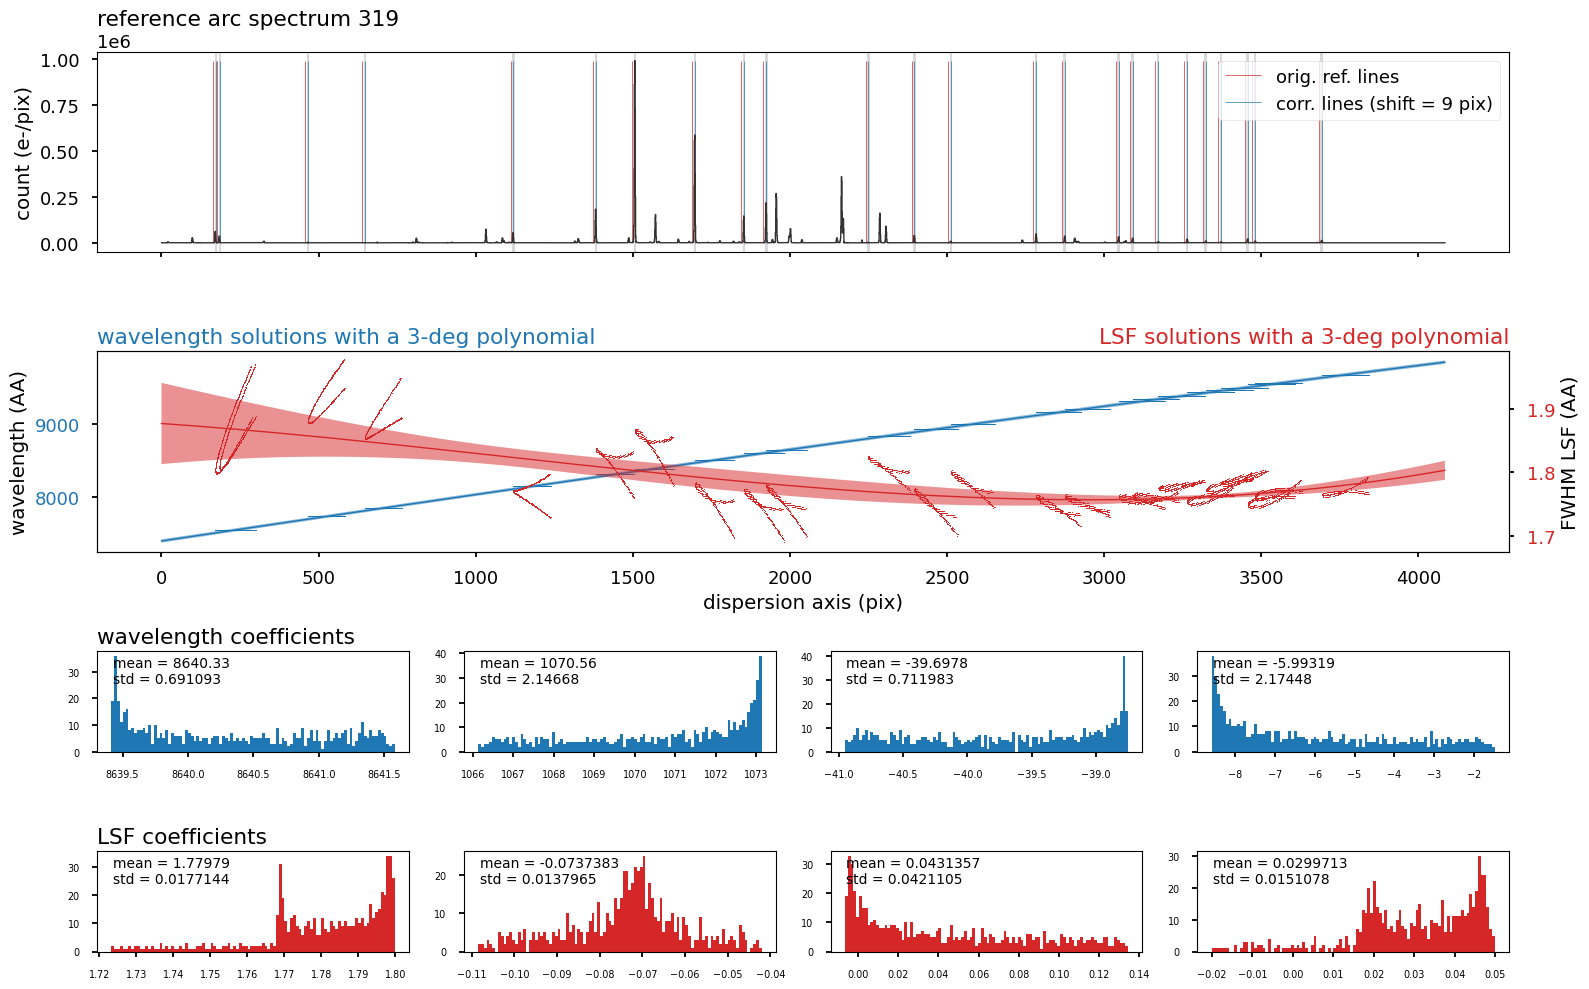

[INFO]: updating header and writing wavelength/LSF to './data/lvm-super-wave-z2-neon.fits' and './data/lvm-super-lsf-z2-neon.fits'
mjd                                    super
kind                                    xarc
camera                                    z3
lamps                                   neon
path      ./data/lvm-super-xarc-z3-neon.fits
Name: 5, dtype: object
[INFO]: reading guess lines from '../../python/lvmdrp/etc/lvm-neon_nist_z1.txt'
[INFO]: going to use fiber 319 as reference
[INFO]: number of guess lines in file 29 percentage masked  17.2414 %
[INFO]: going to use 24 guess lines
[INFO]: reading arc from './data/lvm-super-xarc-z3-neon.fits'
[INFO]: calculating shift in guess lines using CC
[INFO]: maximum CC shift = -15 pix
[INFO]: measuring arc lines for each fiber from reference fiber 319, flux_min = 1e-05, fwhm_max = 5.0 and relative flux limits [0.001, 100.0]


measuring arc lines upwards from ref_fiber = 319: 100%|##########| 319/319 [00:06<00:00, 45.65fiber/s]
measuring arc lines downwards from ref_fiber = 319: 100%|########| 318/318 [00:06<00:00, 47.58fiber/s]


[INFO]: smoothing FWHM of guess lines along cross-dispersion axis using 3-deg polynomials
[INFO]: fitting wavelength solutions using 3-deg polynomials
[INFO]: finished wavelength fitting with median RMS = 1.24891 AA (2.11083 pix)
[INFO]: fitting LSF solutions using 3-deg polynomials
[INFO]: finished LSF fitting with median RMS = 0.0525807 AA (0.0872862 pix)


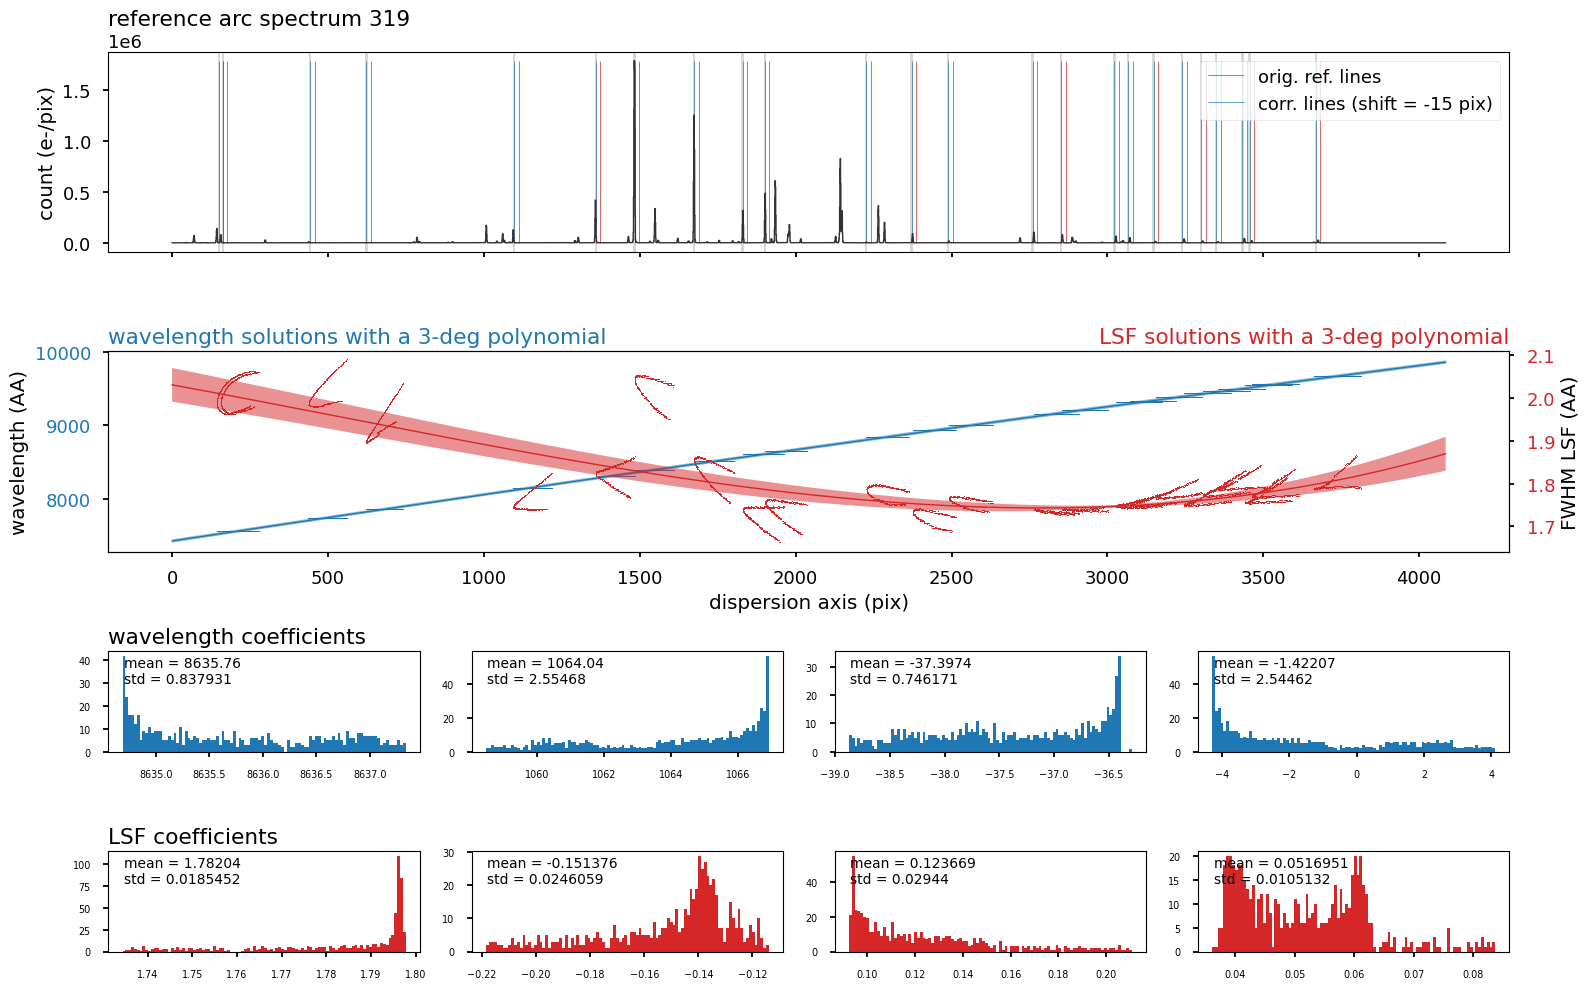

[INFO]: updating header and writing wavelength/LSF to './data/lvm-super-wave-z3-neon.fits' and './data/lvm-super-lsf-z3-neon.fits'


In [7]:
CHANNEL_WL = {"b": (3600, 5930), "r": (5660, 7720), "z": (7470, 9800)}
LAMPS = "neon"
REF_FIBER = 319

masters_arc = get_masters_metadata(path_pattern=out_arc_path, mjd="super", kind="xarc", lamps=LAMPS).sort_values("camera")
print(masters_arc.to_string())

for _, marc in masters_arc.iterrows():
    print(marc)

    try:
        rssMethod.detWaveSolution_drp(
            in_arc=marc.path,
            out_wave=out_arc_path.format(mjd=marc.mjd, kind="wave", camera=marc.camera, lamps=marc.lamps),
            out_lsf=out_arc_path.format(mjd=marc.mjd, kind="lsf", camera=marc.camera, lamps=marc.lamps),
            in_ref_lines=f"../../python/lvmdrp/etc/lvm-{LAMPS}_nist_{marc.camera[0]}1.txt",
            ref_fiber=REF_FIBER, poly_disp=3, poly_fwhm=3, poly_cros=3, poly_kinds="poly,poly,poly",
            flux_min="1e-5", fwhm_max="5.0", rel_flux_limits="0.001,100", aperture=10, plot=1
        )
        rssMethod.createPixTable_drp(
            in_rss=out_arc_path.format(mjd=marc.mjd, kind="xarc", camera=marc.camera, lamps=marc.lamps),
            out_rss=out_arc_path.format(mjd=marc.mjd, kind="warc", camera=marc.camera, lamps=marc.lamps),
            arc_wave=out_arc_path.format(mjd=marc.mjd, kind="wave", camera=marc.camera, lamps=marc.lamps),
            arc_fwhm=out_arc_path.format(mjd=marc.mjd, kind="lsf", camera=marc.camera, lamps=marc.lamps)
        )
        wave_range = CHANNEL_WL[marc.camera[0]]
        rssMethod.resampleWave_drp(
            in_rss=out_arc_path.format(mjd=marc.mjd, kind="warc", camera=marc.camera, lamps=marc.lamps),
            out_rss=out_arc_path.format(mjd=marc.mjd, kind="harc", camera=marc.camera, lamps=marc.lamps),
            start_wave=wave_range[0], end_wave=wave_range[1], disp_pix=1.0, method="linear",
            err_sim=10, parallel="auto", extrapolate=True
        )
    except Exception as e:
        rssMethod.rss_logger.error(e)

In [5]:
fiberflats = get_masters_metadata(path_pattern=out_calib_path, mjd="super", kind="xfiberflat", exptime="x").sort_values("camera")

for _, fiberflat in fiberflats.iterrows():
    print(fiberflat)
    
    rssMethod.createPixTable_drp(
        in_rss=fiberflat.path,
        out_rss=out_calib_path.format(mjd=fiberflat.mjd, kind="wfiberflat", camera=fiberflat.camera, exptime=fiberflat.exptime),
        arc_wave=out_arc_path.format(mjd=fiberflat.mjd, kind="wave", camera=fiberflat.camera, lamps=LAMPS),
        arc_fwhm=out_arc_path.format(mjd=fiberflat.mjd, kind="lsf", camera=fiberflat.camera, lamps=LAMPS)
    )

    wave_range = CHANNEL_WL[fiberflat.camera[0]]
    rssMethod.resampleWave_drp(
        in_rss=out_calib_path.format(mjd=fiberflat.mjd, kind="wfiberflat", camera=fiberflat.camera, exptime=fiberflat.exptime),
        out_rss=out_calib_path.format(mjd=fiberflat.mjd, kind="hfiberflat", camera=fiberflat.camera, exptime=fiberflat.exptime),
        start_wave=wave_range[0], end_wave=wave_range[1], disp_pix=1.0, method="linear",
        err_sim=10, parallel="auto", extrapolate=True
    )

In [6]:
arcs = get_masters_metadata(path_pattern=out_arc_path, mjd="super", kind="xarc", lamps=LAMPS).sort_values("camera")

for _, arc in arcs.iterrows():
    print(arc)
    
    rssMethod.createPixTable_drp(
        in_rss=arc.path,
        out_rss=out_arc_path.format(mjd=arc.mjd, kind="warc", camera=arc.camera, lamps=LAMPS),
        arc_wave=out_arc_path.format(mjd=arc.mjd, kind="wave", camera=arc.camera, lamps=LAMPS),
        arc_fwhm=out_arc_path.format(mjd=arc.mjd, kind="lsf", camera=arc.camera, lamps=LAMPS)
    )

    wave_range = CHANNEL_WL[arc.camera[0]]
    rssMethod.resampleWave_drp(
        in_rss=out_arc_path.format(mjd=arc.mjd, kind="warc", camera=arc.camera, lamps=LAMPS),
        out_rss=out_arc_path.format(mjd=arc.mjd, kind="harc", camera=arc.camera, lamps=LAMPS),
        start_wave=wave_range[0], end_wave=wave_range[1], disp_pix=1.0, method="linear",
        err_sim=10, parallel="auto", extrapolate=True
    )

mjd                                    super
kind                                    xarc
camera                                    b1
lamps                                   neon
path      ./data/lvm-super-xarc-b1-neon.fits
Name: 2, dtype: object
mjd                                    super
kind                                    xarc
camera                                    b2
lamps                                   neon
path      ./data/lvm-super-xarc-b2-neon.fits
Name: 8, dtype: object
mjd                                    super
kind                                    xarc
camera                                    b3
lamps                                   neon
path      ./data/lvm-super-xarc-b3-neon.fits
Name: 3, dtype: object
mjd                                    super
kind                                    xarc
camera                                    r1
lamps                                   neon
path      ./data/lvm-super-xarc-r1-neon.fits
Name: 4, dtype: object
mjd     